# Project 4

Start with the mushroom data in the pandas DataFrame that you constructed in your “Assignment –
Preprocessing Data with sci-kit learn.”
• Use scikit-learn to determine which of the two predictor columns that you selected (odor and one
other column of your choice) most accurately predicts whether or not a mushroom is poisonous. There is
an additional challenge here—to use scikit-learn’s predictive classifiers, you’ll want to convert each of
your two (numeric categorical) predictor columns into a set of columns. See for one approach pandas
get_dummies() method.
• Clearly state your conclusions along with any recommendations for further analysis.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import numpy as np
import pandas as pd
#set some pandas options controling output format
pd.set_option('display.notebook_repr_html',True)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

sns.set(style='whitegrid',font_scale=4)
sns.set_color_codes('pastel')

In [2]:
dfmush = pd.read_csv(r'c:\data\agaricus-lepiota.data', \
                      header = None, \
                      usecols = [0, 3, 5,], \
                      names = ['poisonous', 'color', 'odor'])

In [3]:
# I'm creating a dictionary to hold the values for the replacement
# of the strings to integers. For the edible column I'm using :
# 0 : if it IS NOT poisonous (edible), and 
# 1 : if it IS poisonous.
dictNewValues = {
    'e' : 0, \
    'p' : 1
}

# replace the cell values with the values in the dictionary
dfmush.replace({'poisonous': dictNewValues}, inplace=True)

# review the dataframe
dfmush.head(5)

,poisonous,color,odor
0,1,n,p
1,0,y,a
2,0,w,l
3,1,w,p
4,0,g,n


In [4]:
dictNewValues = {
    'n' : 0, \
    'b' : 1, \
    'c' : 2, \
    'g' : 3, \
    'r' : 4, \
    'p' : 5, \
    'u' : 6, \
    'e' : 7, \
    'w' : 8, \
    'y' : 9, \
}

# replace the cell values with the values in the dictionary
dfmush.replace({'color': dictNewValues}, inplace=True)

# review the dataframe
dfmush.head(5)

,poisonous,color,odor
0,1,0,p
1,0,9,a
2,0,8,l
3,1,8,p
4,0,3,n


In [5]:
dictNewValues = {
    'a' : 0, \
    'l' : 1, \
    'c' : 2, \
    'y' : 3, \
    'f' : 4, \
    'm' : 5, \
    'n' : 6, \
    'p' : 7, \
    's' : 8
}

# replace the cell values with the values in the dictionary
dfmush.replace({'odor': dictNewValues}, inplace=True)

# review the dataframe
dfmush.head(5)

,poisonous,color,odor
0,1,0,7
1,0,9,0
2,0,8,1
3,1,8,7
4,0,3,6


In [6]:
# get the shape of this dataset
dfmush.shape

(8124, 3)

In [7]:
# I am going to store the first 8000 observations for training and the last 124 for testing
# below I am creating 3 series with the first 8000 observations
sPoisonous = pd.Series(dfmush.poisonous[:7999])
sColor = pd.Series(dfmush.color[:7999])
sOdor = pd.Series(dfmush.odor[:7999])

# I assign those observations to a new dataframe containing the TRAINING data
dfTraining = pd.DataFrame({'color':sColor, 'odor':sOdor, 'poisonous':sPoisonous})

# I create 3 series with the last 124 observations for testing purposes
sPoisonous = pd.Series(dfmush.poisonous[8000:])
sColor = pd.Series(dfmush.color[8000:])
sOdor = pd.Series(dfmush.odor[8000:])

# I assign those observations to a new dataframe containing the TESTING data
dfTests = pd.DataFrame({'color':sColor, 'odor':sOdor, 'poisonous':sPoisonous})

In [8]:
# display the data types of the columns
print(dfTraining.dtypes)
print(dfTests.dtypes)

color        int64
odor         int64
poisonous    int64
dtype: object
color        int64
odor         int64
poisonous    int64
dtype: object


In [9]:
# for this assignment I will create 3 different datasets to test against:
# knnColor : only contains the COLOR dataset
# knnOdor : only contains the ODOR dataset
# knnAll = contains both the color and odor data
# below I instantiate the three different estimators:
knnColor = KNeighborsClassifier(n_neighbors= 5)
knnOdor = KNeighborsClassifier(n_neighbors= 5)
knnAll = KNeighborsClassifier(n_neighbors= 5)

# to fit/train the model with the data in our pandas dataframe
# we will pass the fit() function two arguments fit(features, responses)
# The features are the columns 'color' and 'odor' and the responses
# are in the poisonous column.
# NOTE: I am using the ravel() function. ravel() is a numpy function
# that converts the supllied pandas column to the flattened array
# scikit-learn expects.

# fit the color estimator with the values from the dtraining dataset
knnColor.fit(dfTraining[['color']].values, \
             dfTraining[['poisonous']].values.ravel())           

# fit the odor estimator with the values from the dtraining dataset
knnOdor.fit(dfTraining[['odor']].values, \
            dfTraining[['poisonous']].values.ravel())

# fit the all estimator with the values from the dtraining dataset
knnAll.fit(dfTraining[['color','odor']].values, \
           dfTraining[['poisonous']].values.ravel())

KNeighborsClassifier()

In [10]:
# Test the color estimator against the testing dataset and store the results in the testing dataframe.
dfTests['preColor'] = pd.Series(knnColor.predict(dfTests[['color']].values), dfTests.index)\

# print the accuracy score of the color estimator
print(metrics.accuracy_score( \
                             dfTests[['poisonous']].values.ravel(), \
                             dfTests[['preColor']].values))

0.5403225806451613


In [11]:
# Test the odor estimator against the testing dataset and store the results in the testing dataframe.
dfTests['preOdor'] = pd.Series(knnOdor.predict(dfTests[['odor']].values), dfTests.index)

# print the accuracy score of the odor estimator
print(metrics.accuracy_score( \
                             dfTests[['poisonous']].values.ravel(), \
                             dfTests[['preOdor']].values))

1.0


In [12]:
# Test the all estimator against the testing dataset and store the results in the testing dataframe.
dfTests['preAll'] = pd.Series(knnAll.predict(dfTests[['color','odor']].values), dfTests.index)

# print the accuracy score of the all estimator
print(metrics.accuracy_score( \
                             dfTests[['poisonous']].values.ravel(), \
                             dfTests[['preAll']].values))

1.0


# Conclusions based on scikit-learn results:

According to the results of the accuracy scores, mushroom cap-color is not a very effective predictor of edibility, with an accuracy score of only 0.54. On the other hand, mushroom odor appears to be a perfect predictor of edibillity. It has an accuracy of 1.0. This is confusing to me because of one aspect of the test dataset and that is mushrooms with an odor of 6, or "no odor". There are 4 charts below and they can be seperated into two categories:

    Category 1: Test Data
        Chart 1: observations in the test data
        Chart 2: the predictions made from the test data
    Category 2: Training data
        Chart 3: observations in the test data
        Chart 4: the predictions made from the test data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Chart 1: Test Data : Observations Only')

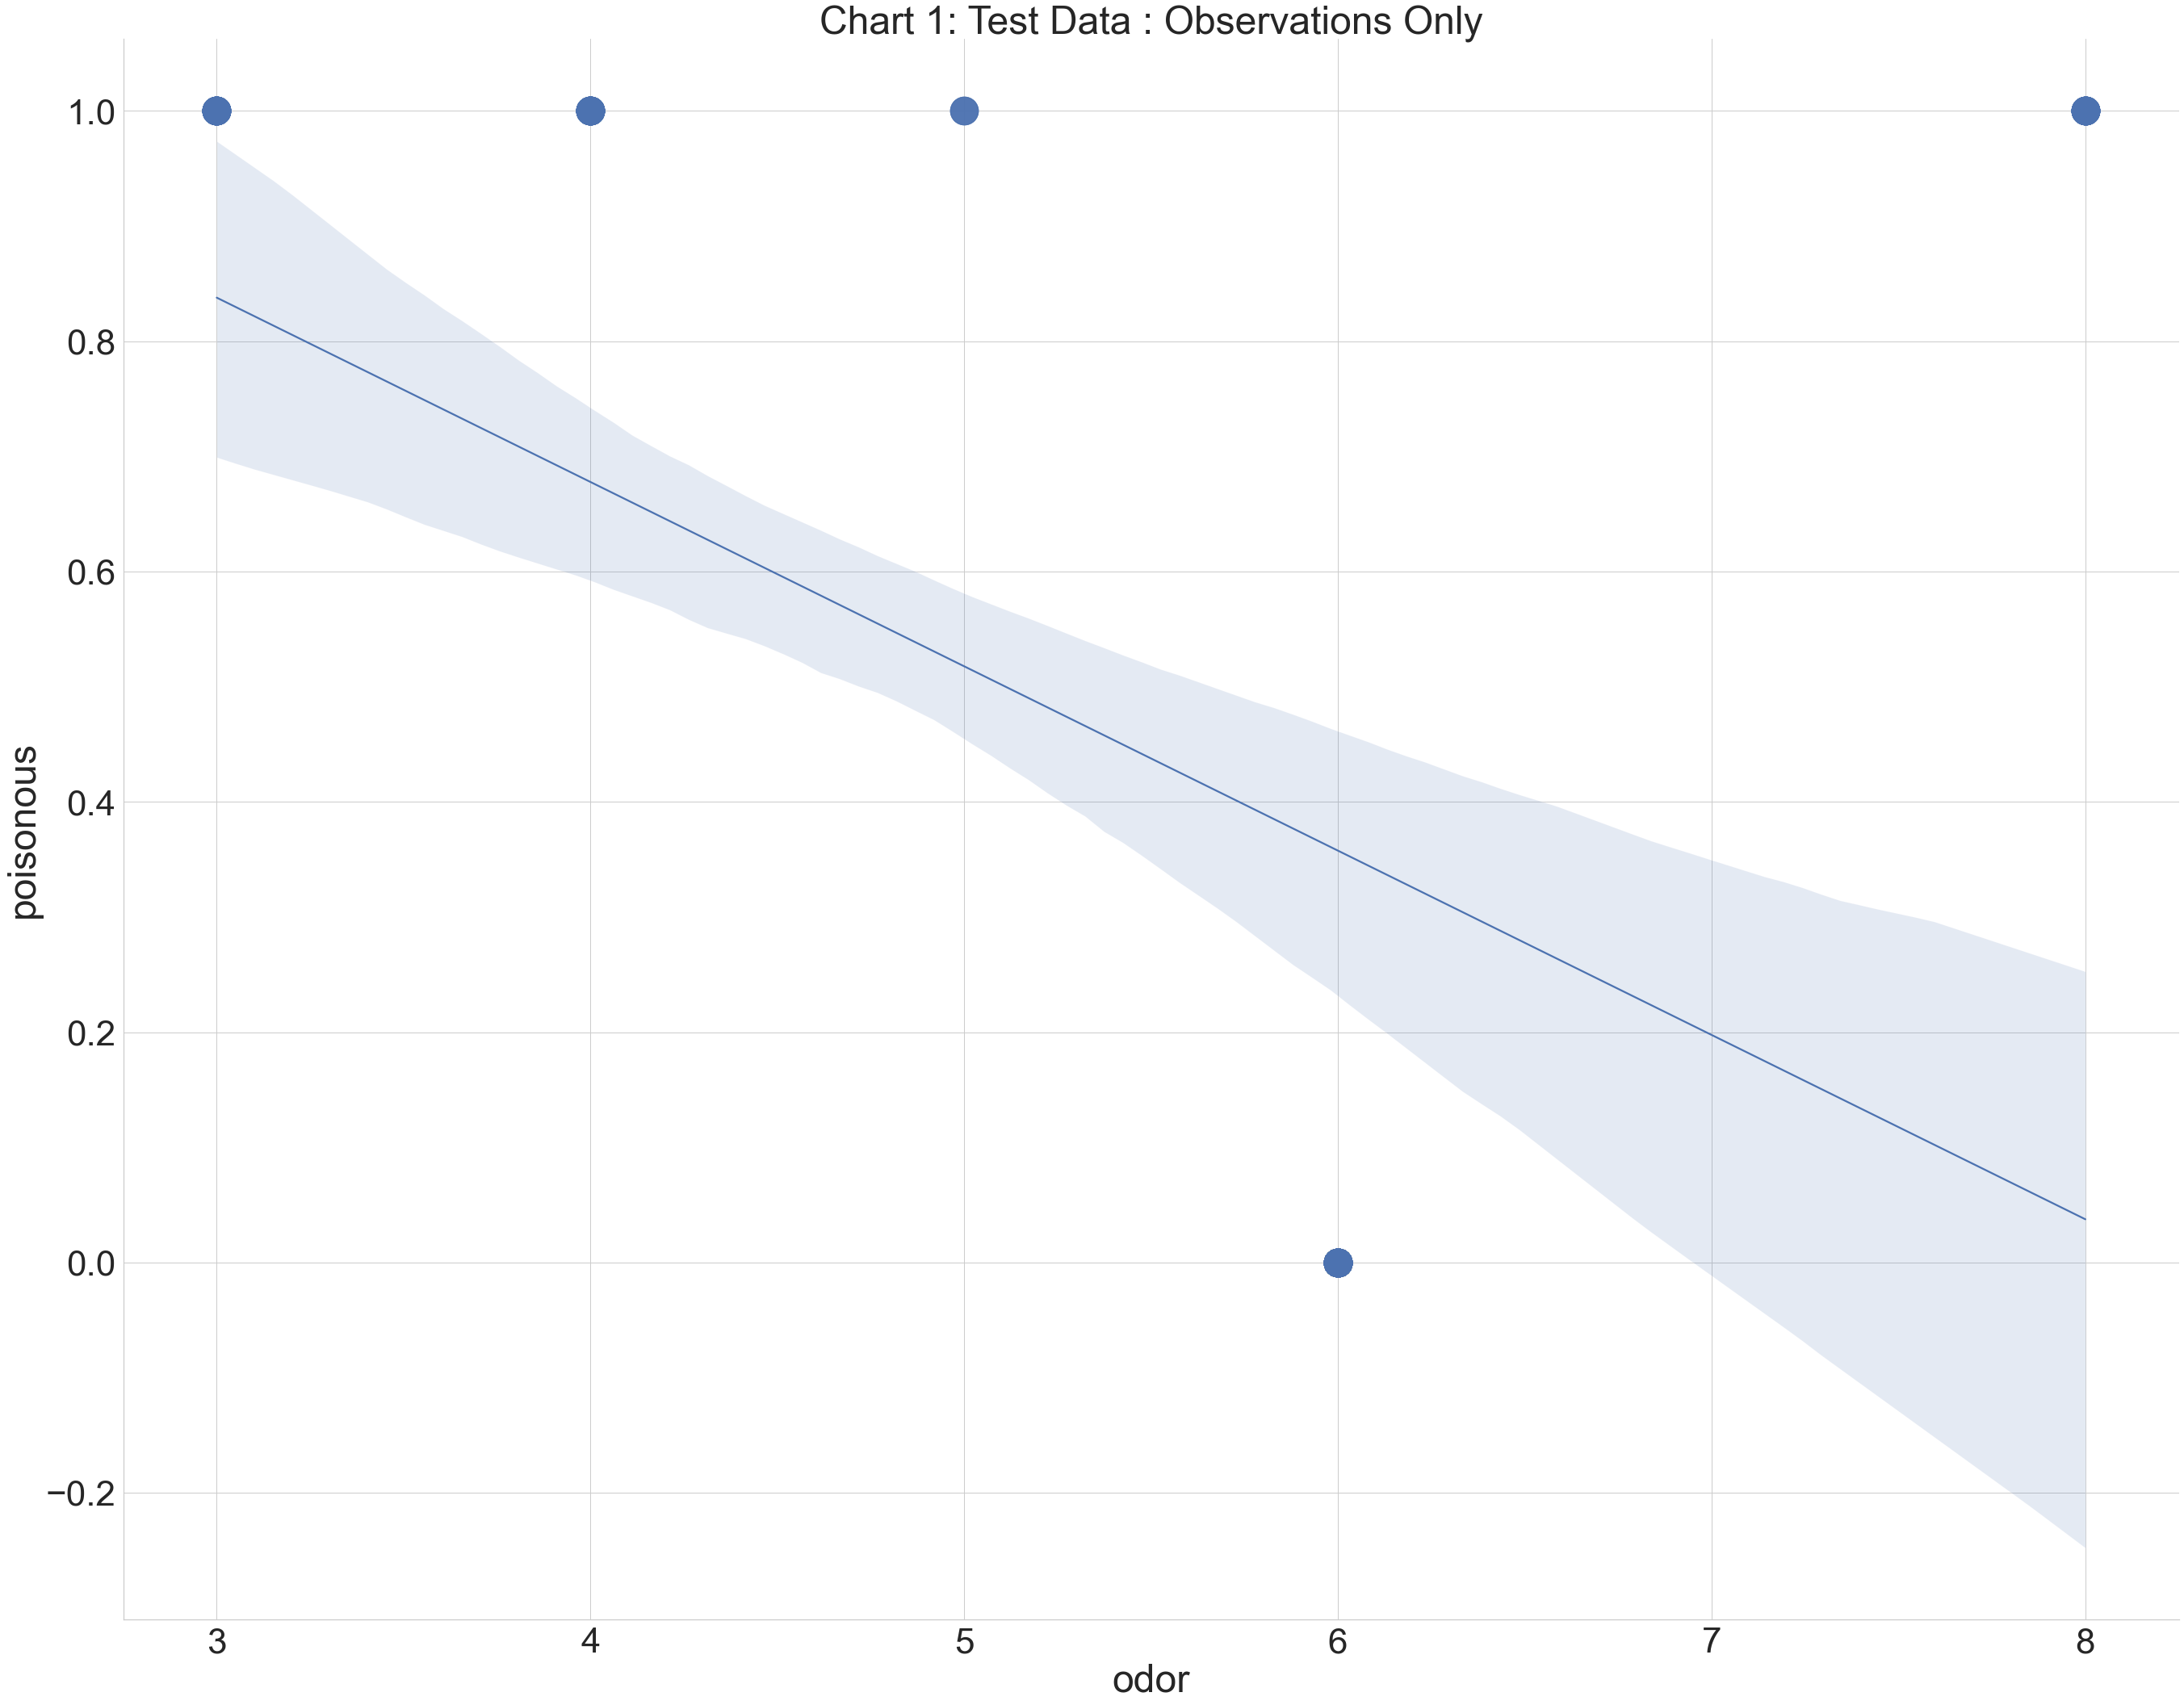

In [13]:
# Create a scatterplot that shows the relationship between odor and poisonous
sns.lmplot('odor', 'poisonous', data=dfTests, size=30, aspect=1.294, scatter_kws={"s": 1200}).savefig('C:\Output\Test Data - Observations Only.pdf')
plt.title("Chart 1: Test Data : Observations Only")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Chart 2: Test Data : Prediction vs Observation')

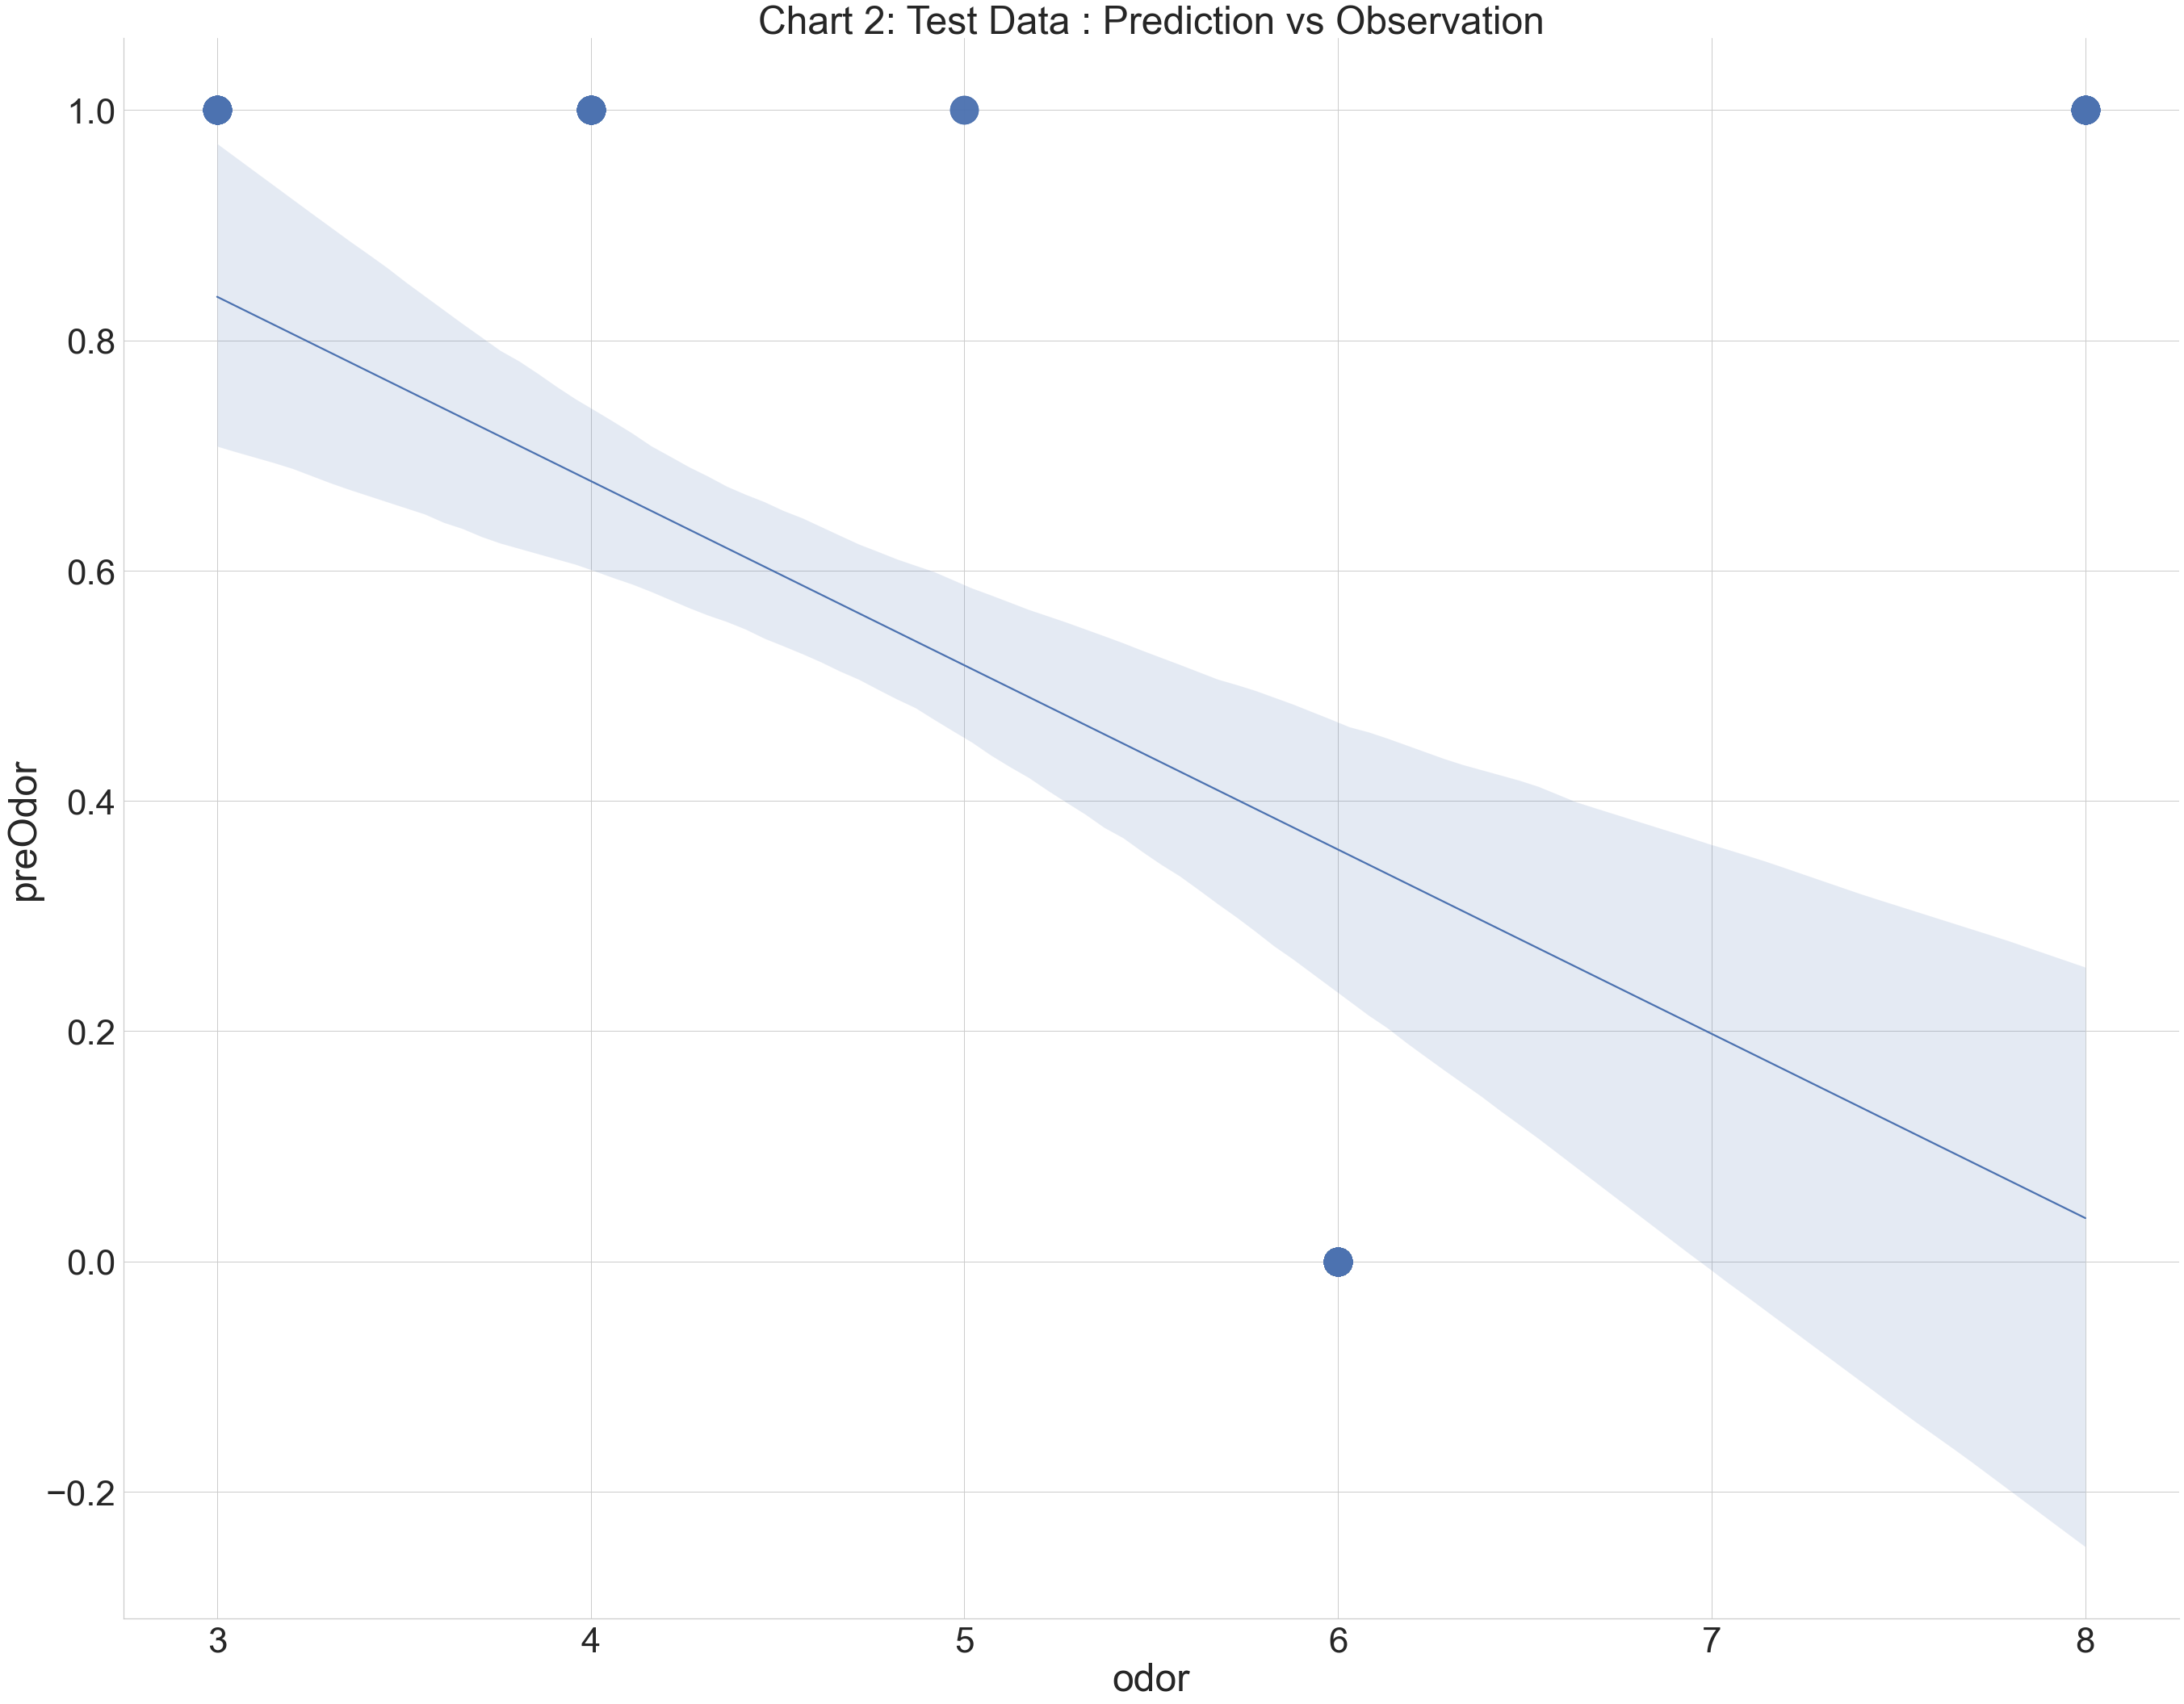

In [14]:
# Create a scatterplot that shows the relationship between odor and poisonous
sns.lmplot('odor', 'preOdor', data=dfTests, size=30, aspect=1.294, scatter_kws={"s": 1200}).savefig('C:\Output\Test Data - Prediction vs Observation.pdf')
plt.title("Chart 2: Test Data : Prediction vs Observation")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Chart 3: Training Data : Observations Only')

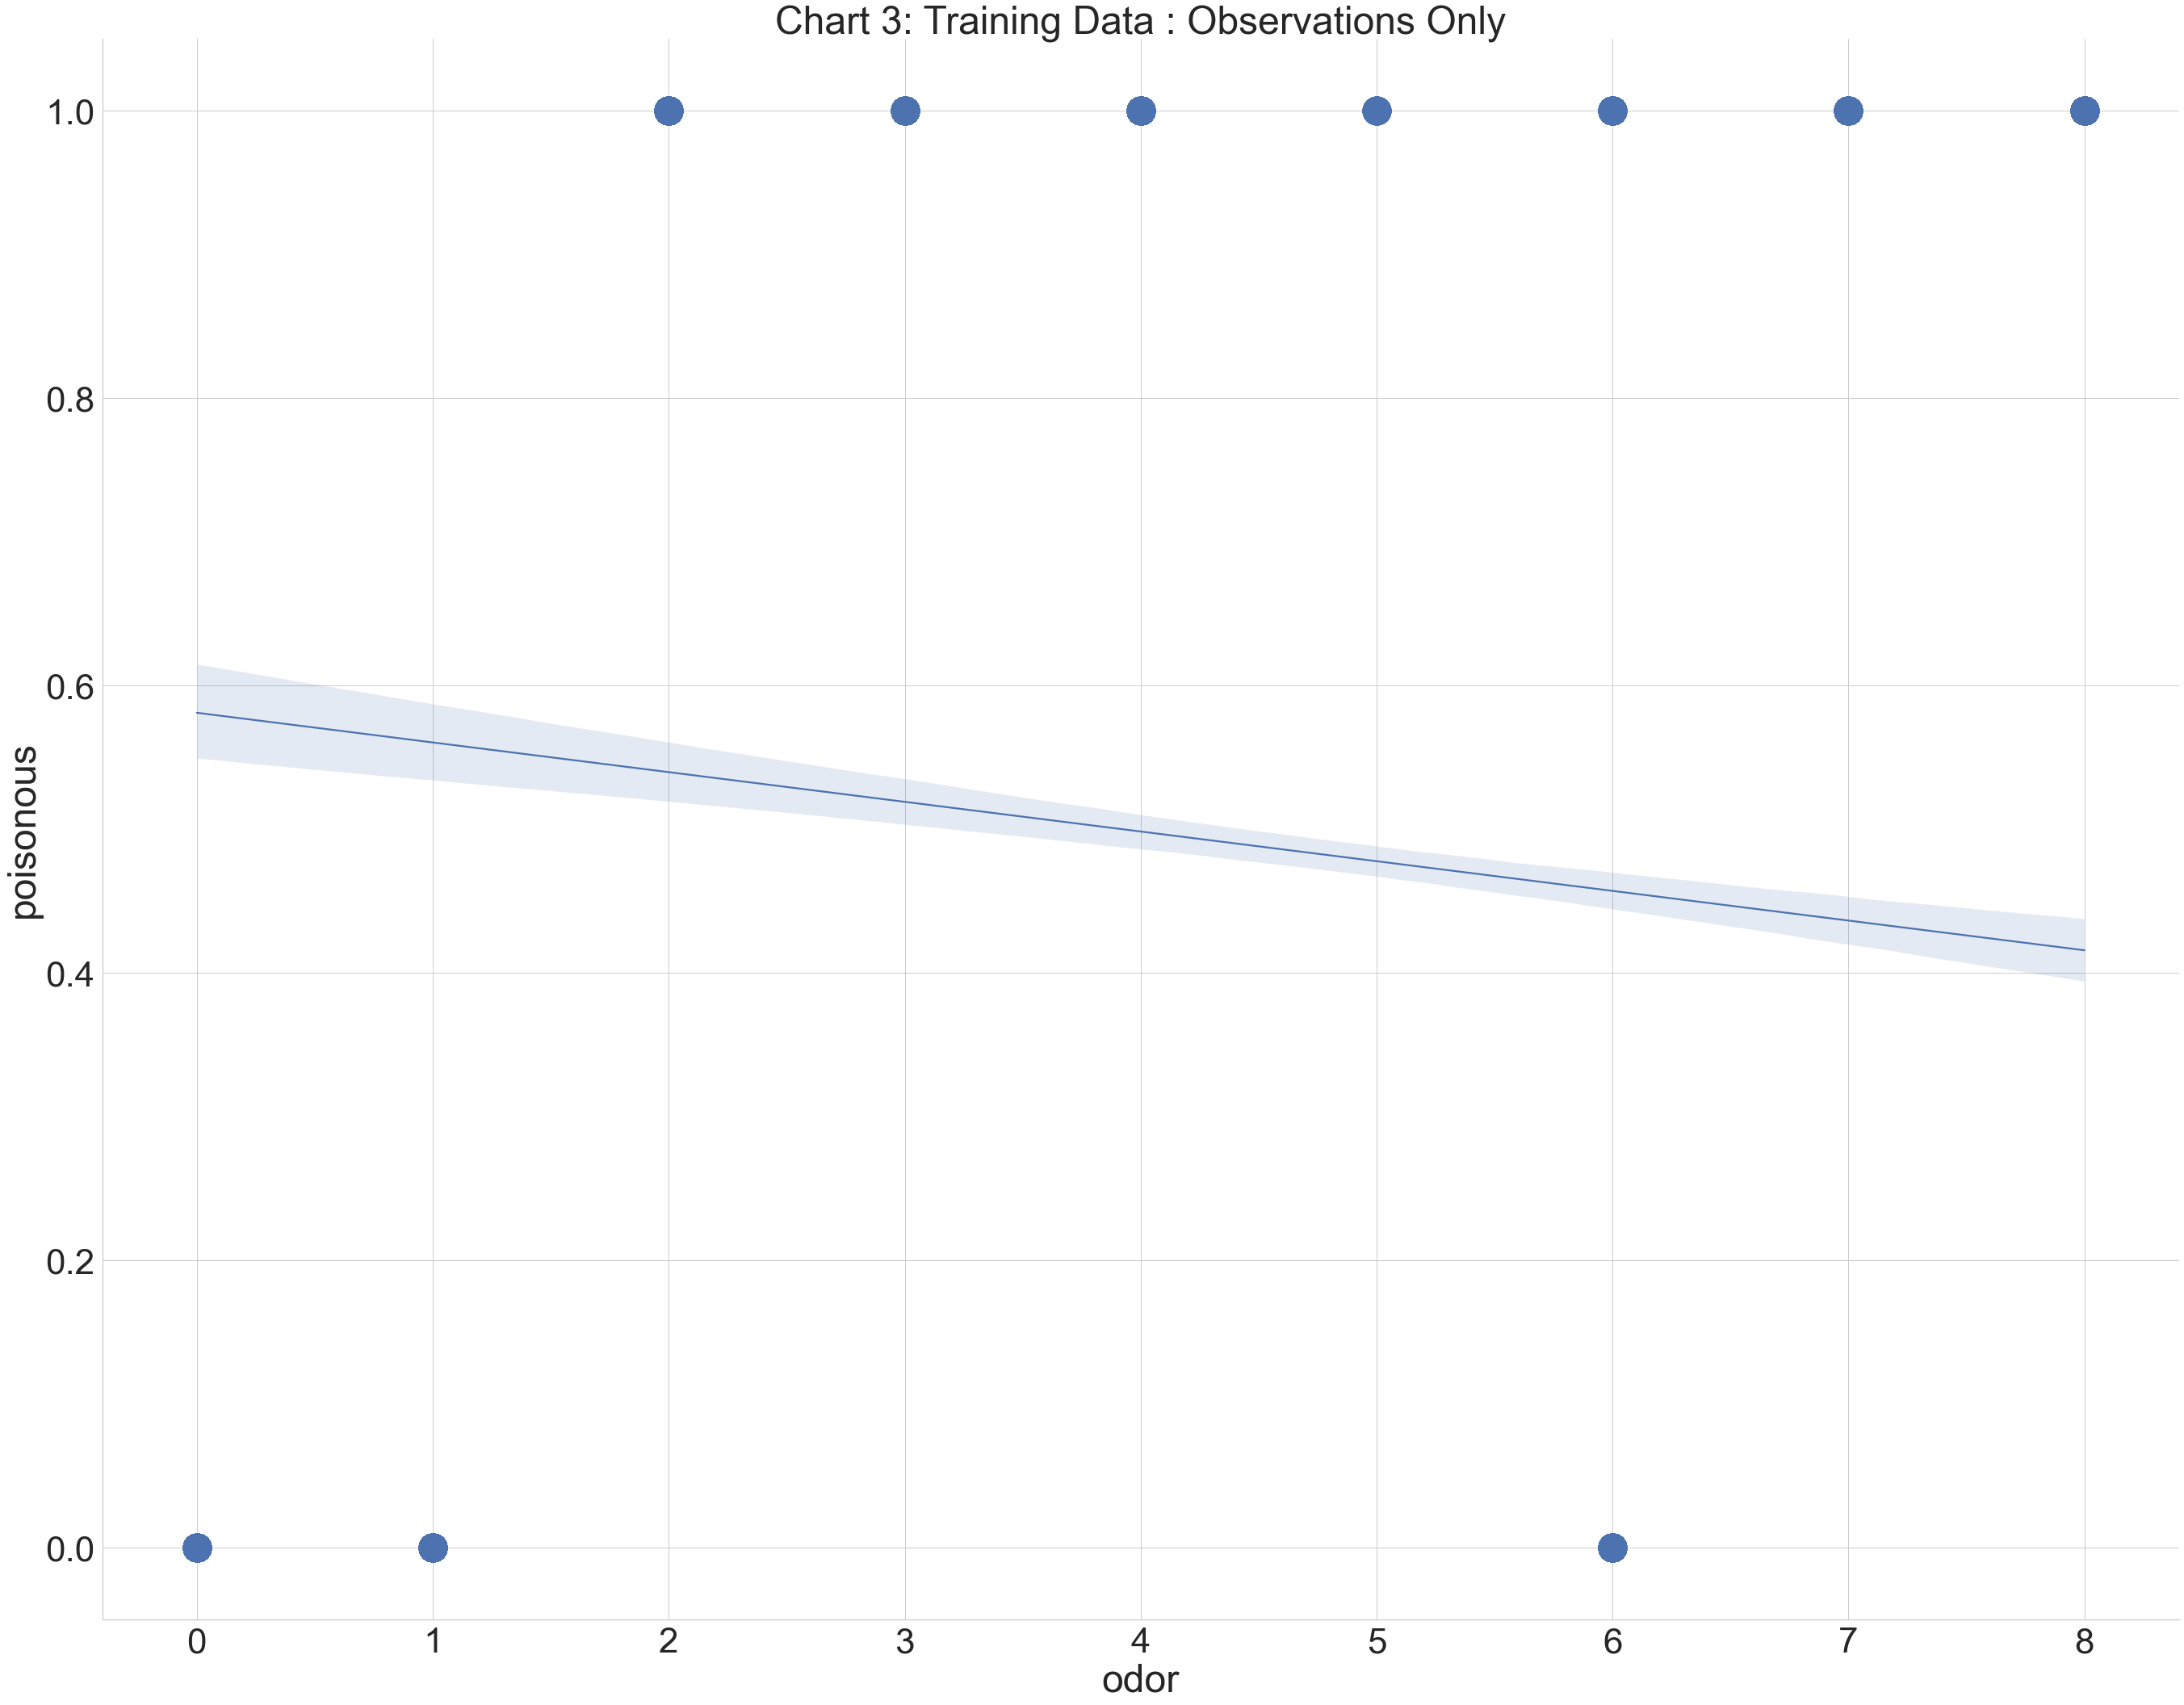

In [15]:
# Test the odor estimator against the TRAINING dataset and store the results in the TRAINING dataframe.
dfTraining['preOdor'] = pd.Series(knnOdor.predict(dfTraining[['odor']].values), dfTraining.index)

# Create a scatterplot that shows the relationship between odor and poisonous
sns.lmplot('odor', 'poisonous', data=dfTraining, size=30, aspect=1.294, scatter_kws={"s": 1200}).savefig('C:\Output\Training Data - Observations Only.pdf')
plt.title("Chart 3: Training Data : Observations Only")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Chart 4: Training Data : Prediction vs Observation')

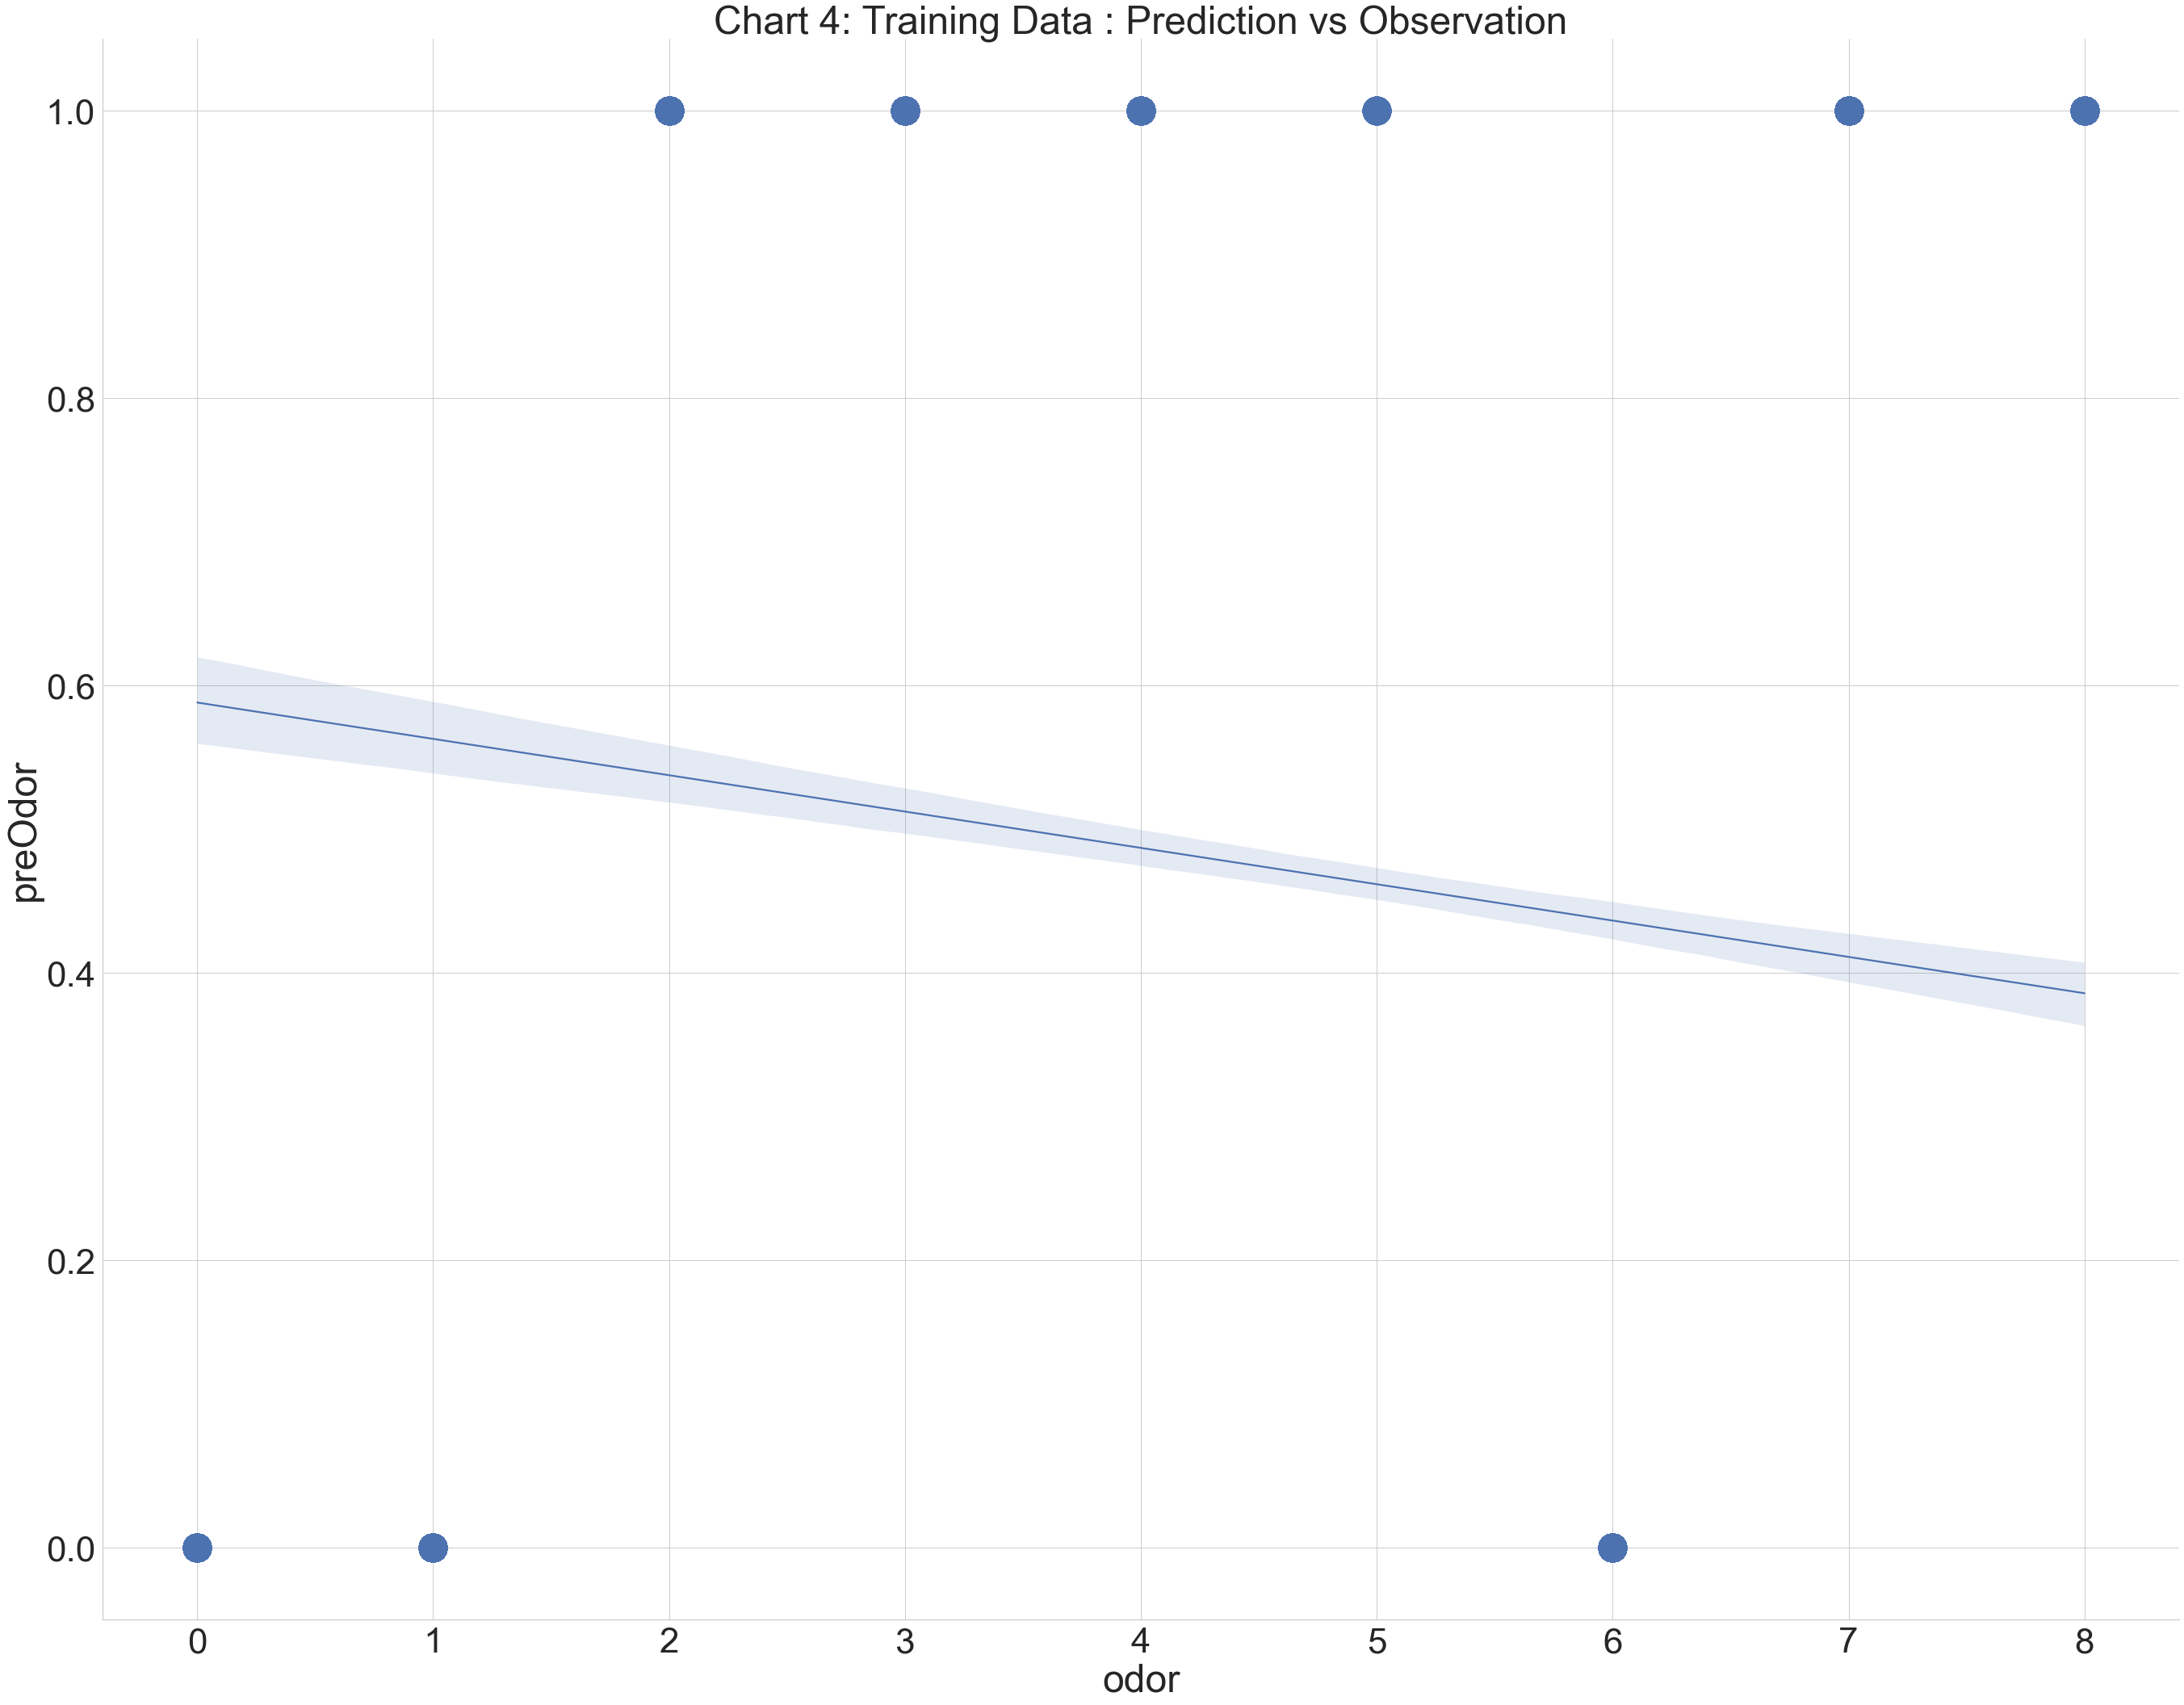

In [16]:
# Create a scatterplot that shows the relationship between odor and the predicted poisonous with our training data
sns.lmplot('odor', 'preOdor', data=dfTraining, size=30, aspect=1.294, scatter_kws={"s": 1200}).savefig('C:\Output\Training Data - Prediction vs Observation.pdf')
plt.title("Chart 4: Training Data : Prediction vs Observation")

In [17]:
# print the accuracy score of the odor TRAINING estimator
print(metrics.accuracy_score( \
                             dfTraining[['poisonous']].values.ravel(), \
                             dfTraining[['preOdor']].values))

0.9849981247655957
